# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='cmb10') # 中文字体

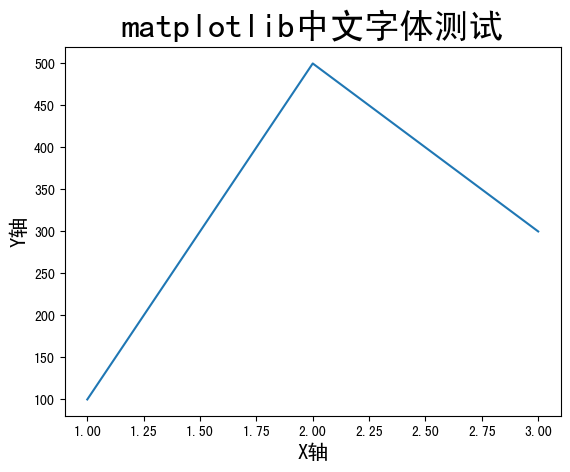

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [7]:
df = pd.read_csv('各类别准确率评估指标.csv')


In [8]:
df

,类别,precision,recall,f1-score,support,accuracy
0,云,0.880000,0.871287,0.875622,101.0,0.871287
1,仓鼠,0.739726,0.857143,0.794118,63.0,0.857143
2,兔子,0.844444,0.760000,0.800000,100.0,0.760000
3,兰花,0.889908,0.960396,0.923810,101.0,0.960396
4,割草机,0.906542,0.970000,0.937198,100.0,0.970000
...,...,...,...,...,...,...
97,黑猩猩,0.951456,0.980000,0.965517,100.0,0.980000
98,鼩鼱,0.715789,0.673267,0.693878,101.0,0.673267
99,龙虾,0.904255,0.841584,0.871795,101.0,0.841584
100,macro avg,0.841190,0.840937,0.839961,9978.0,0.840937


## 选择评估指标

In [10]:
# feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

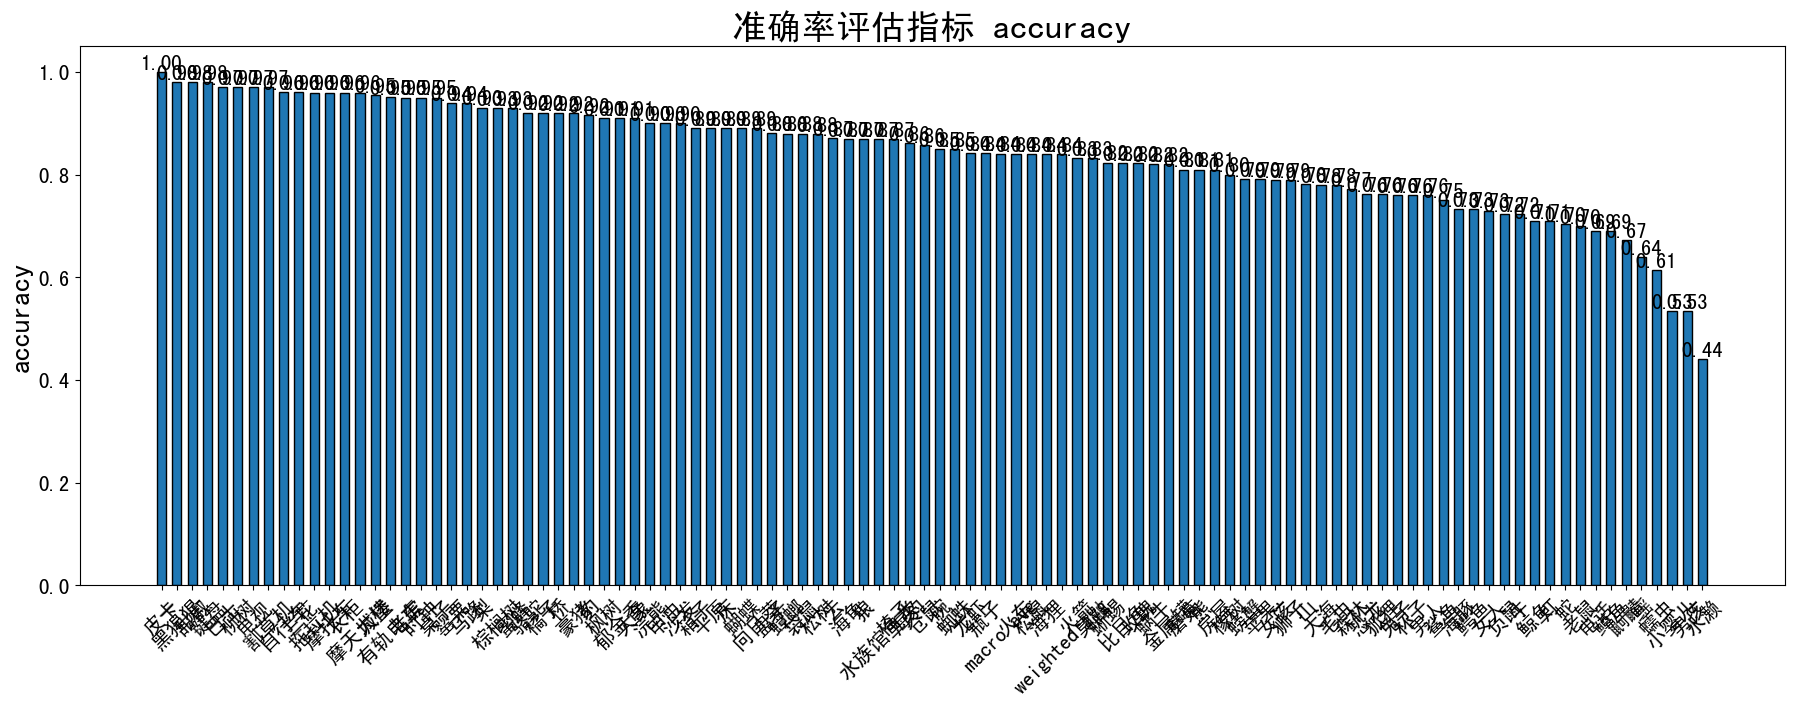

In [11]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()